# Reading mp3 file metadata

We need the following data to parse out what type of media we are dealing with to be consisent in our training set (this is not needed for the streaming mode - see below)

In [4]:
from pydub.utils import mediainfo

In [6]:
media = mediainfo("common_voice_en_21875014.mp3")

In [7]:
for i in media:
    print("{key}: {value}".format(key=i, value=media[i]))

index: 0
codec_name: mp3
codec_long_name: MP3 (MPEG audio layer 3)
profile: unknown
codec_type: audio
codec_time_base: 1/48000
codec_tag_string: [0][0][0][0]
codec_tag: 0x0000
sample_fmt: fltp
sample_rate: 48000
channels: 1
channel_layout: mono
bits_per_sample: 0
id: N/A
r_frame_rate: 0/0
avg_frame_rate: 0/0
time_base: 1/14112000
start_pts: 0
start_time: 0.000000
duration_ts: 28449792
duration: 2.016000
bit_rate: 64178
max_bit_rate: N/A
bits_per_raw_sample: N/A
nb_frames: N/A
nb_read_frames: N/A
nb_read_packets: N/A
DISPOSITION: {'default': '0', 'dub': '0', 'original': '0', 'comment': '0', 'lyrics': '0', 'karaoke': '0', 'forced': '0', 'hearing_impaired': '0', 'visual_impaired': '0', 'clean_effects': '0', 'attached_pic': '0', 'timed_thumbnails': '0'}
filename: common_voice_en_21875014.mp3
nb_streams: 1
nb_programs: 0
format_name: mp3
format_long_name: MP2/3 (MPEG audio layer 2/3)
size: 16173
probe_score: 51
TAG: {'encoder': 'Lavf57.56.101'}


# Reading Media

In [16]:
import array
from pydub import AudioSegment
from pydub.utils import get_array_type

sound = AudioSegment.from_file(file="common_voice_en_21875014.mp3")
left = sound.split_to_mono()[0]

bit_depth = left.sample_width * 8
array_type = get_array_type(bit_depth)

numeric_array = array.array(array_type, left._data)

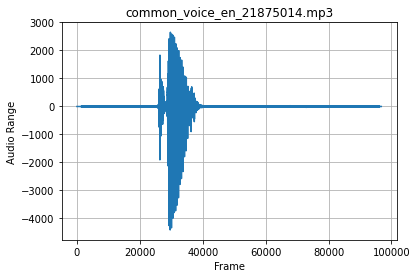

In [26]:
import matplotlib.pyplot as plt
t = np.arange(0, len(numeric_array))
fig, ax = plt.subplots()
ax.plot(t, numeric_array)
ax.set(xlabel='Frame', ylabel='Audio Range',
       title='common_voice_en_21875014.mp3')
ax.grid()
plt.show()

# Streaming Media

This is the streaming mode which takes in the system audio output (lets say Zoom for example) and outputs a stream of numbers. We can adjust the output to be any numerical data type (here it is np.int16)

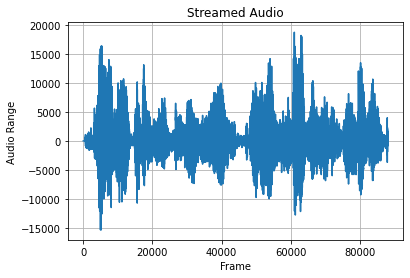

In [74]:
import pyaudio
import numpy as np

CHUNK = 2**11
RATE = 44100
SECONDS = 1

p=pyaudio.PyAudio()
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK)

data_bucket = []

for i in range(int(SECONDS*44100/1024)): #go for a few seconds
    data = np.frombuffer(stream.read(CHUNK),dtype=np.int16)
#     data = np.average(np.nan_to_num(data))
    data_bucket.extend(data)

stream.stop_stream()
stream.close()
p.terminate()

t_s = np.arange(0, len(data_bucket))
fig, ax = plt.subplots()
ax.plot(t_s, data_bucket)
ax.set(xlabel='Frame', ylabel='Audio Range',
       title='Streamed Audio')
ax.grid()
plt.show()

In [5]:
import librosa
from librosa import display as ld

In [6]:
x, sr = librosa.load("common_voice_en_21875014.mp3", sr=48000)

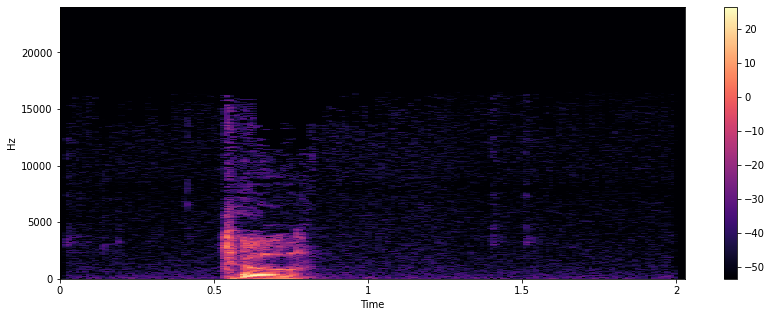

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()